In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
np.random.seed(123)

In [2]:
house_prices = [305195, 1091868, 773273, 448000, 301005, 417500]
living_area_sqm = [222, 349, 191, 297, 159, 86]
land_area_sqm = [870, 1872, 2418, 800, 800, 94]
bedrooms_no = [6, 4, 4, 5, 4, 2]
building_grade = [7, 10, 8, 7, 7, 8]

In [3]:
X = np.column_stack((living_area_sqm, land_area_sqm, bedrooms_no, building_grade))
X[:5]

array([[ 222,  870,    6,    7],
       [ 349, 1872,    4,   10],
       [ 191, 2418,    4,    8],
       [ 297,  800,    5,    7],
       [ 159,  800,    4,    7]])

In [4]:
y = house_prices

In [5]:
X = sm.add_constant(X)

In [6]:
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     48.66
Date:                Thu, 18 Jul 2024   Prob (F-statistic):              0.107
Time:                        17:28:38   Log-Likelihood:                -68.082
No. Observations:                   6   AIC:                             146.2
Df Residuals:                       1   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.836e+05   3.59e+05     -1.627      0.3

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


In [7]:
res.params

array([-5.83605508e+05,  1.11973350e+03,  1.58658987e+02, -6.38055712e+04,
        1.25234726e+05])

<BarContainer object of 4 artists>

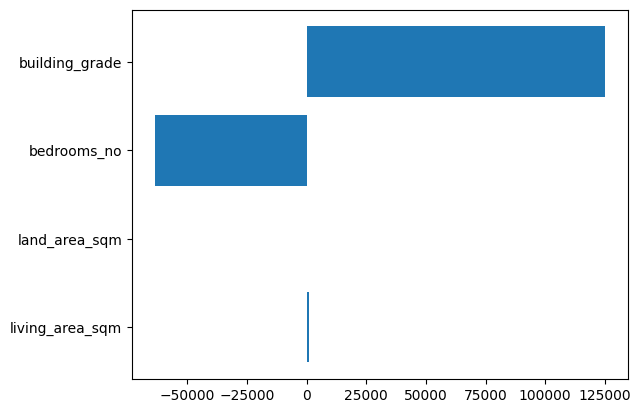

In [8]:
plt.barh(["living_area_sqm", "land_area_sqm", "bedrooms_no", "building_grade"], res.params[1:])

# Bad model because coefficients are not standardized here. 

## Correct way using zscore

In [9]:
# Standardize beta coefficients
living_area_sqm

[222, 349, 191, 297, 159, 86]

In [10]:
from scipy import stats
stats.zscore(living_area_sqm)

array([ 0.05385651,  1.51952301, -0.3039046 ,  0.9194076 , -0.6732064 ,
       -1.51567612])

In [14]:
# Apply to all variables
X = np.column_stack((living_area_sqm, land_area_sqm, bedrooms_no, building_grade))
X = stats.zscore(X)

In [15]:
X

array([[ 0.05385651, -0.35318897,  1.5109662 , -0.78086881],
       [ 1.51952301,  0.94630436, -0.13736056,  2.0302589 ],
       [-0.3039046 ,  1.65441151, -0.13736056,  0.15617376],
       [ 0.9194076 , -0.44397194,  0.68680282, -0.78086881],
       [-0.6732064 , -0.44397194, -0.13736056, -0.78086881],
       [-1.51567612, -1.35958302, -1.78568733,  0.15617376]])

In [16]:
X = sm.add_constant(X)
y = house_prices
res = sm.OLS(y, X).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     48.66
Date:                Thu, 18 Jul 2024   Prob (F-statistic):              0.107
Time:                        17:41:01   Log-Likelihood:                -68.082
No. Observations:                   6   AIC:                             146.2
Df Residuals:                       1   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.561e+05   2.05e+04     27.132      0.0

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


<BarContainer object of 4 artists>

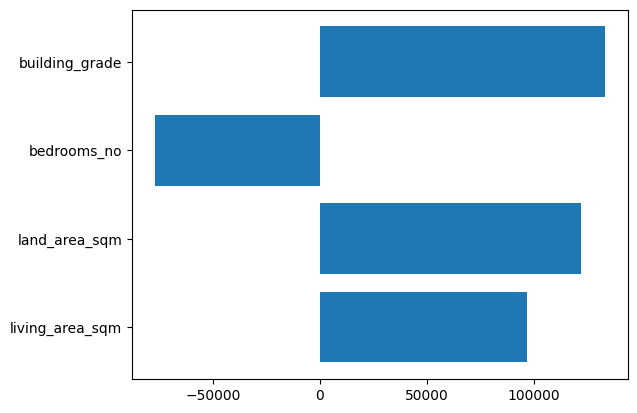

In [18]:
plt.barh(["living_area_sqm", "land_area_sqm", "bedrooms_no", "building_grade"], res.params[1:])

# Statistical Significance of this coeff and Hypothesis Testing

H0: There is no linear influence of our independent variable on our dependent variable (Coefficient is zero).

H1: There is a linear influence of our independent variable on our dependent variable (Coefficient is not zero).

Example: for variable living room area

H0: There is no linear infuence of living room area on house price.

H1: There is a linear infuence of living room area on house price.

In [19]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.995
Model:                            OLS   Adj. R-squared:                  0.974
Method:                 Least Squares   F-statistic:                     48.66
Date:                Thu, 18 Jul 2024   Prob (F-statistic):              0.107
Time:                        18:45:11   Log-Likelihood:                -68.082
No. Observations:                   6   AIC:                             146.2
Df Residuals:                       1   BIC:                             145.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.561e+05   2.05e+04     27.132      0.0

/Users/mymac/anaconda3/lib/python3.10/site-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


# t-statistic

### t = coef/std error

In [20]:
# Coefficients
res.params

array([556140.16666667,  97024.90632679, 122337.14529876, -77418.59501576,
       133648.91863209])

In [21]:
# Standard Errors
res.bse

array([20497.34410557, 43253.34039152, 27197.3990179 , 45145.68770867,
       44316.30684932])

### t-values manual calculation

In [22]:
res.params / res.bse

array([27.13230377,  2.24317718,  4.4981193 , -1.71486135,  3.0157955 ])

### t-values directly

In [23]:
res.tvalues

array([27.13230377,  2.24317718,  4.4981193 , -1.71486135,  3.0157955 ])

In [24]:
res.pvalues

array([0.02345292, 0.26696816, 0.13926534, 0.33608962, 0.20383194])

The p value of 0.266 (living area sqm). This is much higher than the standard %5 (0.05). This is saying that null hypothesis H0 could not be rejected and there is no linear infuence of living room area on house price.
There is a high (26.6%) chance The Living area variable has no effect on the output variable and the observation happened by chance.

Possible actions:
 - Collect more data
 - Try less variables